<a href="https://colab.research.google.com/github/ankit-mishra/CodeColab/blob/master/Introduction%20to%20Time%20Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def plot_series(time, series, format="-"):
  plt.figure(figsize=(10, 6))
  plt.plot(time, series, format)
  plt.xlabel("time")
  plt.ylabel("value")
  plt.grid(True)

In [16]:
def trend(time, slope=0):
  return slope * time

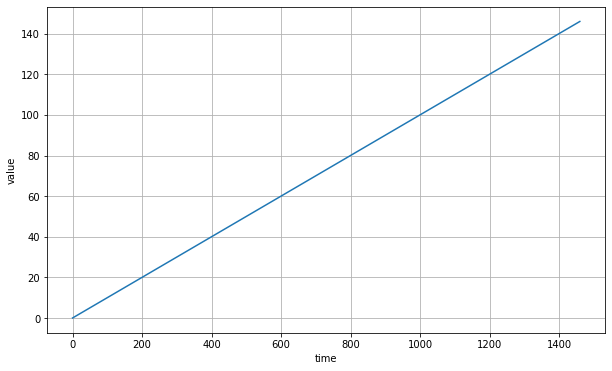

In [17]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)
plt.show()

In [18]:
def seasonal_pattern(season_time):
  return np.where(
      season_time < 0.4,
      np.cos(season_time * 2 * np.pi),
      1 / np.exp(3 * season_time)
  )

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

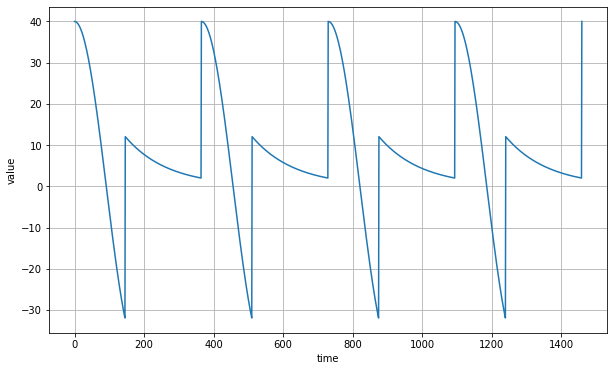

In [19]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

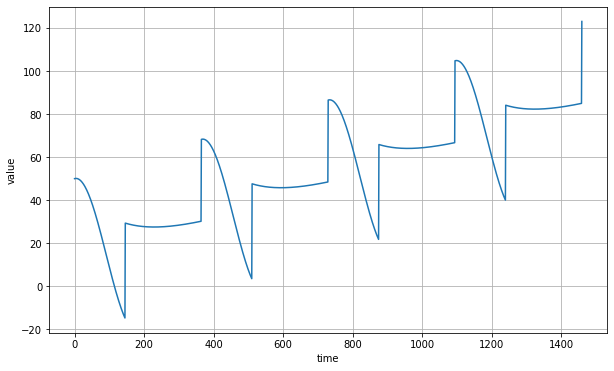

In [20]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365,amplitude=amplitude)
plot_series(time, series)
plt.show()

In [21]:
def noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

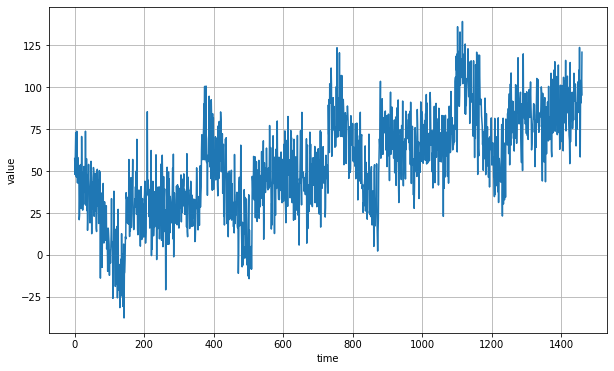

In [22]:
noise_level = 15
noisy_series = series + noise(time, noise_level, seed=42)
plot_series(time, noisy_series)
plt.show()

In [23]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  o = 0.5
  o = -0.1
  ar = rnd.randn(len(time) + 50)
  ar[:50] = 100
  for step in range(50, len(time) + 50):
    ar[step] += o1 * ar[step - 50]
    ar[step] += o2 * ar[step - 33]
  return ar[50:] * amplitude

In [24]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  o = 0.8
  ar = rnd.randn(len(time) + 50)
  ar[:50] = 100
  for step in range(1, len(time) + 1):
    ar[step] += o * ar[step - 1]
  return ar[1:] * amplitude

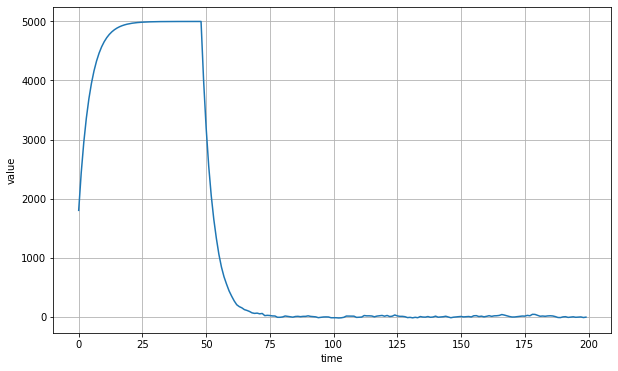

In [25]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()